In [1]:
import pytorch_lightning as pl
from pl_bolts.models.self_supervised import SimCLR

In [5]:
# load resnet50 pretrained using SimCLR on imagenet
weight_path = 'https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt'
simclr = SimCLR.load_from_checkpoint(weight_path, strict=False)

Downloading: "https://pl-bolts-weights.s3.us-east-2.amazonaws.com/simclr/bolts_simclr_imagenet/simclr_imagenet.ckpt" to C:\Users\lvavrek/.cache\torch\hub\checkpoints\simclr_imagenet.ckpt


  0%|          | 0.00/229M [00:00<?, ?B/s]

D:\Users\lVavrek\lv-pytorch-env\lib\site-packages\pytorch_lightning\core\saving.py:209: UserWarning: Found keys that are not in the model state dict but in the checkpoint: ['non_linear_evaluator.block_forward.2.weight', 'non_linear_evaluator.block_forward.2.bias']
  rank_zero_warn(


In [6]:
simclr_resnet50 = simclr.encoder
simclr_resnet50.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Self-supervised is a method of pre-training target model (ie. CNN) weights by extracting information from data, instead of using labels. Bellow is the example how we can re-use pretrained network (via self-supervised learning) as a feature extractor.

In [9]:
# we can extract information that were pretrained via unsupervised learningq
if False:
    my_dataset = SomeDataset()
    for batch in my_dataset:
        X, y = batch
        out = simclr_resnet50(X)

Goal: Verify using self-supervised learning approach for parkinson dissease detection. Source data can be either imagenet (might be interesting to see comparison with supervised approach, but technically it should be very close) or better some voice recording dataset (separate vowels would be perfect!).

In [1]:
# https://pytorch.org/audio/stable/_modules/torchaudio/datasets/librispeech.html#LIBRISPEECH

import os
from torchaudio.datasets.librispeech import LIBRISPEECH

path_to_data_folder = os.path.normpath(r'D:\Users\lVavrek\research\data')
librispeech = LIBRISPEECH(root=path_to_data_folder, download=True)

In [17]:
libri_v2 = LibrispeechSpectrogramDataset()
librispeech.__getitem__(0), libri_v2.__getitem__(0)


((tensor([[-0.0065, -0.0055, -0.0062,  ...,  0.0033,  0.0005, -0.0095]]),
  16000,
  'CHAPTER ONE MISSUS RACHEL LYNDE IS SURPRISED MISSUS RACHEL LYNDE LIVED JUST WHERE THE AVONLEA MAIN ROAD DIPPED DOWN INTO A LITTLE HOLLOW FRINGED WITH ALDERS AND LADIES EARDROPS AND TRAVERSED BY A BROOK',
  103,
  1240,
  0),
 tensor([[8.8073e-02, 6.7872e-02, 4.0480e-02, 1.2577e+00, 2.9112e+00, 4.4582e-01,
          1.7415e-02, 5.5938e-03, 9.1911e-04, 2.2096e-03, 1.3337e-03, 7.4013e-04,
          7.3121e-04, 3.1131e-03, 1.6610e-03, 6.3524e-05, 1.3600e-03, 2.1696e-03,
          1.9370e-03, 8.5962e-03, 3.7205e-03, 1.7573e-04, 5.4041e-04, 2.4128e-04,
          8.0926e-06, 2.3964e-04, 1.7503e-04, 4.3359e-04, 3.9609e-04, 3.4390e-05,
          3.8009e-04, 8.1627e-04, 1.0333e-03, 8.2671e-04, 2.4539e-04, 4.9992e-04,
          2.4826e-06, 7.5042e-04, 4.9544e-04, 7.7929e-05, 3.6624e-04, 1.0027e-03,
          1.4571e-03, 1.3796e-03, 1.0348e-03, 3.5696e-04, 1.7919e-04, 2.9744e-04,
          2.4342e-04, 3.1260e-05,

(torch.Size([1, 513, 441]),
 tensor([[[1.5383e-01, 5.2416e-02, 1.1458e-01,  ..., 2.0164e-01,
           8.7863e-03, 5.8401e-02],
          [7.6619e-02, 1.1723e-02, 5.8292e-02,  ..., 7.2437e-02,
           1.4043e-02, 7.2730e-02],
          [2.4324e-02, 7.5197e-03, 1.5703e-02,  ..., 1.1555e-02,
           2.1732e-02, 3.0048e-01],
          ...,
          [4.0956e-05, 4.4417e-05, 6.6275e-06,  ..., 3.7695e-06,
           2.3809e-04, 1.0299e-04],
          [2.7785e-04, 2.3321e-05, 3.4331e-05,  ..., 8.9100e-06,
           2.7053e-04, 2.5662e-05],
          [6.0410e-04, 7.8971e-06, 5.0573e-05,  ..., 3.0398e-07,
           1.3619e-04, 9.1958e-05]]]))

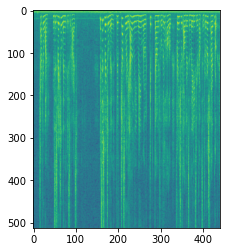

In [4]:
from torchaudio.transforms import Spectrogram, AmplitudeToDB # try using mel spectrogram as well

n_fft = 1024
win_length = None
hop_length = 512

def get_spectrogram(audio_data):
    return Spectrogram(
        n_fft = n_fft,
        win_length = win_length,
        hop_length = hop_length,
        center = True,
        pad_mode = 'reflect',
        power = 2.0
    ).forward(audio_data)

import matplotlib.pylab as plt

sample = librispeech.__getitem__(0)
spectrogram = get_spectrogram(sample[0]) # we only use audio data

spectrogram_img = AmplitudeToDB().forward(spectrogram)
plt.imshow(spectrogram_img[0])
spectrogram.shape, spectrogram


In [3]:

import os
from torchaudio.datasets.librispeech import LIBRISPEECH

path_to_data_folder = os.path.normpath(r'D:\Users\lVavrek\research\data')
# librispeech = LIBRISPEECH(root=path_to_data_folder, download=True)

class LibrispeechSpectrogramDataset(LIBRISPEECH):
    def __init__(self, root=path_to_data_folder, download=True, transform=None, train=True):
        super().__init__(root=root, download=download, url='train-clean-100' if train is True else 'test-clean')
        if transform:
            self.transform = transform
        else:
            self.transform = get_spectrogram

    def __getitem__(self, idx):
        sample = super().__getitem__(idx)

        return get_spectrogram(sample[0])[:, :, 45]



In [66]:
# result is (513, 45)

if False:
    libri = LibrispeechSpectrogramDataset()
    min_1 = libri[0].shape[1]
    min_2 = libri[0].shape[2]
    for x in libri:
        min_1 = min(x.shape[1], min_1)
        min_2 = min(x.shape[2], min_2)
    min_1, min_2

In [4]:
from pl_bolts.models.self_supervised import SimCLR
from pl_bolts.models.self_supervised.simclr import SimCLREvalDataTransform, SimCLRTrainDataTransform
from pytorch_lightning.trainer import Trainer
from torch.utils.data import DataLoader

# https://github.com/PyTorchLightning/lightning-bolts/blob/master/pl_bolts/models/self_supervised/simclr/simclr_module.py
#
# According to the implementation (line 373), we can't use custom datasets for the SimCLR
# Note: check for details and explaination, it seems that I missunderstood how it works under the hood (no idea atm.)
#

train_dataset = LibrispeechSpectrogramDataset(transform=SimCLRTrainDataTransform())
val_dataset = LibrispeechSpectrogramDataset(transform=SimCLREvalDataTransform())

batch_size = 8
num_workers = 1

# model = SimCLR(gpus=,num_samples=,batch_size=,dataset=)
model = SimCLR(gpus=1, num_samples=len(train_dataset), batch_size=batch_size, dataset='imagenet')
trainer = Trainer(gpus=1)
trainer.fit(model, DataLoader(train_dataset, batch_size=batch_size, num_workers=num_workers), DataLoader(val_dataset, batch_size=batch_size, num_workers=num_workers))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type       | Params
------------------------------------------
0 | encoder    | ResNet     | 25.6 M
1 | projection | Projection | 4.5 M 
------------------------------------------
30.0 M    Trainable params
0         Non-trainable params
30.0 M    Total params
120.078   Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

D:\Users\lVavrek\lv-pytorch-env\lib\site-packages\pytorch_lightning\trainer\data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


In [1]:
import os
import pandas as pd # replace
from torchvision.io import read_image

class FooDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file) # replace
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0]) # replace
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1] # replace
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# DataLoader is a wrapper that provides easy way to retrieve data features and labels, supports mini-batches and data shuffling and uses multiprocessing to optimize retrieval speed
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)